In [1]:
library(broom)
library(tidyverse)
library(glmnet)
library(stats)


Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loaded glmnet 2.0-10



In [2]:
#read the csv file with data 
acquisitions = read.csv("C:\\Users\\user14\\Desktop\\Portfolio\\Marketing_Mix_Modeling\\mmm_data2.csv")
acq = ts(acquisitions, frequency=1)
acq1 = acq[,2]
tv_sp=acq[,3]
fb_sp = acq[,4]

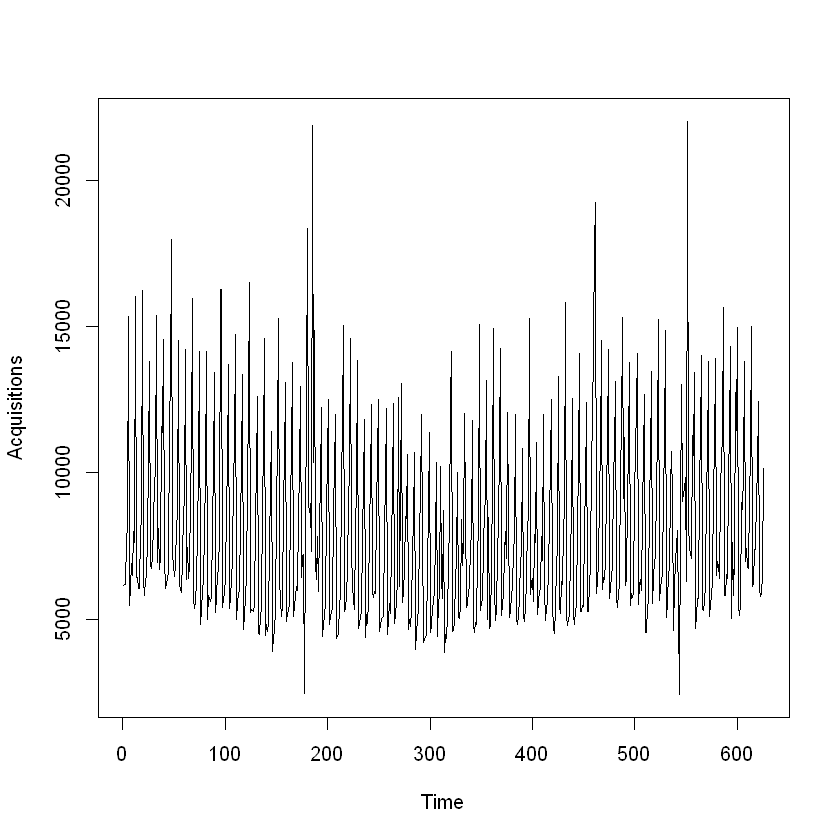

In [3]:
plot(acq1,ylab="Acquisitions")

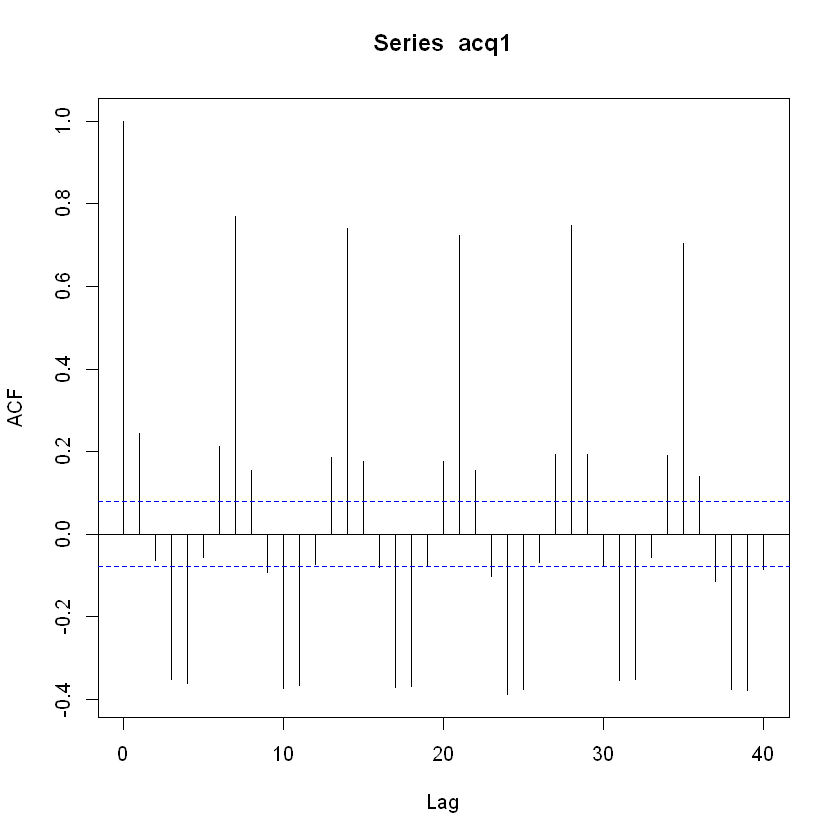

In [4]:
#----ACF 
 par(mfrow = c(1, 1))
 acf(acq1, 40)


Call:
lm(formula = acq1 ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
 -5602  -2440  -1121   1775  13995 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7908.0285   255.4328  30.959   <2e-16 ***
x              0.2145     0.7059   0.304    0.761    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3192 on 624 degrees of freedom
Multiple R-squared:  0.000148,	Adjusted R-squared:  -0.001454 
F-statistic: 0.09236 on 1 and 624 DF,  p-value: 0.7613


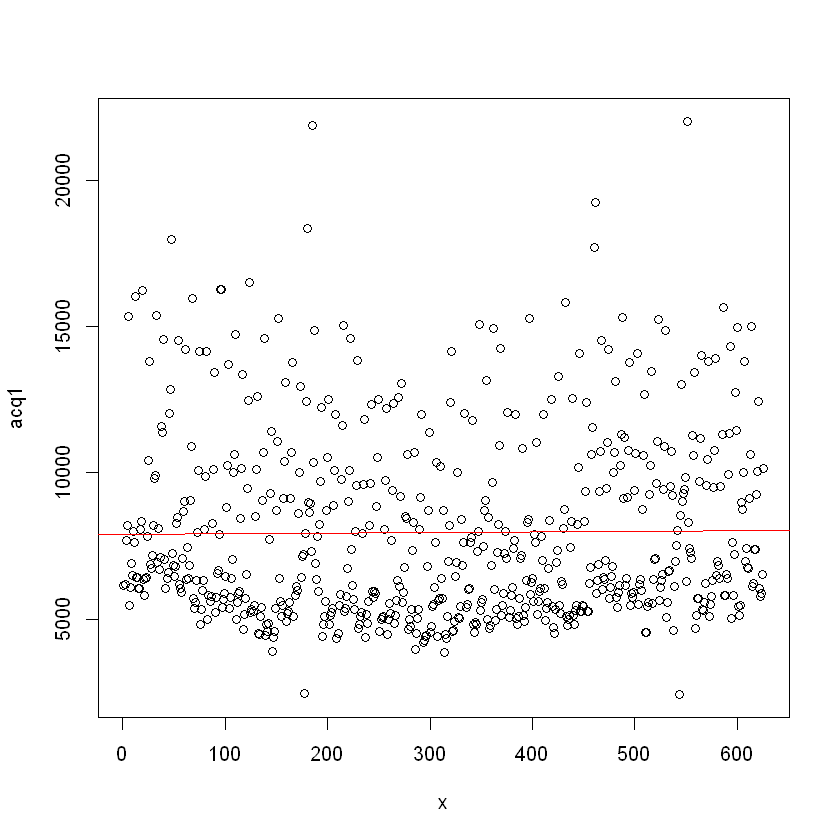

In [10]:
# examine if there is a linear or quadratic trend
 x = c(1:length(acq1))
 plot(x,acq1)
 reg = lm(acq1~x) 
 abline(reg,col="red")
 summary(reg)

In [11]:
 reg = lm(acq1~x) 
 x2 = x^2
 reg2 = lm(acq1~x+x2)
 summary(reg2) 


Call:
lm(formula = acq1 ~ x + x2)

Residuals:
   Min     1Q Median     3Q    Max 
 -5917  -2394  -1351   1671  14180 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.940e+03  3.802e+02  23.513  < 2e-16 ***
x           -9.644e+00  2.801e+00  -3.444 0.000613 ***
x2           1.572e-02  4.325e-03   3.635 0.000301 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3161 on 623 degrees of freedom
Multiple R-squared:  0.02092,	Adjusted R-squared:  0.01777 
F-statistic: 6.655 on 2 and 623 DF,  p-value: 0.001382


In [18]:
#transform the date into days
acquisitions$days = weekdays(as.Date(acquisitions$Date,'%m/%d/%Y'))
# and replace the days with numbers
acquisitions$days[acquisitions$days %in% c( "Tuesday", "Wednesday", "Monday")] <- 0
acquisitions$days[acquisitions$days %in% c( "Thursday")] <- 1
acquisitions$days[acquisitions$days %in% c( "Friday")] <- 2
acquisitions$days[acquisitions$days %in% c( "Saturday")] <- 3
acquisitions$days[acquisitions$days %in% c( "Sunday")] <- 4
# make the categorical variable days as factor
acquisitions$days <- factor(acquisitions$days, 
         levels=c(0, 1, 2, 3, 4), labels=c("3_first_days","Thursday", "Friday", "Saturday", "Sunday")) 
# dataframe with the diplay and tv-1 variables and the categorical day variable
d6 = as.data.frame(ts.intersect(y = acq1, STV1 = sqrt(stats::lag(tv_sp, -1)), SDIS = sqrt(fb_sp)))
day = acquisitions[2:626, 5]
d6 = cbind(d6,day)

# fit the model
fit = lm(y~ SDIS + STV1+day, data = d6)
summary(fit)                                     


Call:
lm(formula = y ~ SDIS + STV1 + day, data = d6)

Residuals:
    Min      1Q  Median      3Q     Max 
-6916.7  -854.3  -210.0   645.7 13301.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4821.284    323.905  14.885   <2e-16 ***
SDIS          32.633     12.989   2.512   0.0122 *  
STV1           2.833      1.313   2.158   0.0313 *  
dayThursday  401.708    201.119   1.997   0.0462 *  
dayFriday   2986.286    201.094  14.850   <2e-16 ***
daySaturday 3790.907    202.010  18.766   <2e-16 ***
daySunday   7632.938    203.638  37.483   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1650 on 618 degrees of freedom
Multiple R-squared:  0.7354,	Adjusted R-squared:  0.7328 
F-statistic: 286.2 on 6 and 618 DF,  p-value: < 2.2e-16


In [19]:
#take the model with the Thutsday, Friday e.t.c as variables
results = model.matrix(fit, d6)
results= subset(results,select= -results[,1])

In [21]:
# use the new data for prediction
acquisitions_pred = read.csv("C:\\Users\\user14\\Desktop\\Portfolio\\Marketing_Mix_Modeling\\mmm_data2_predict.csv")

acq4 = ts(acquisitions_pred, frequency=1)
acq5  = acq[,4]
tv_sp2=acq4[,3]
fb_sp2 = acq4[,4]

acquisitions_pred$days = weekdays(as.Date(acquisitions_pred$Date,'%m/%d/%Y'))

acquisitions_pred$days[acquisitions_pred$days %in% c( "Tuesday", "Wednesday", "Monday")] <- 0
acquisitions_pred$days[acquisitions_pred$days %in% c( "Thursday")] <- 1
acquisitions_pred$days[acquisitions_pred$days %in% c( "Friday")] <- 2
acquisitions_pred$days[acquisitions_pred$days %in% c( "Saturday")] <- 3
acquisitions_pred$days[acquisitions_pred$days %in% c( "Sunday")] <- 4

acquisitions_pred$days <- factor(acquisitions_pred$days, 
         levels=c(0, 1, 2, 3, 4), labels=c("3_first_days","Thursday", "Friday", "Saturday", "Sunday")) 
d7 = as.data.frame(ts.intersect(STV1 = sqrt(stats::lag(tv_sp2, -1)), SDIS = sqrt(fb_sp2)))

day = acquisitions_pred[2:289, 5]
d7 = cbind(d7,day)

# make the lag and sqrt transformations to the input data
input = model.matrix(~ STV1+SDIS+ day - 1, d7)
input= subset(input,select= -day3_first_days) 
# make the predict
predictions = predict(fit, newdata =  data.frame(input))
acquisitions_pred[2:289, 2]= predictions


